#Simple Linear Regression¶


In [1]:
#import librarires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns


In [2]:
sns.set_style('darkgrid')


In [3]:
df=pd.read_csv('/content/femur_data.csv')
df.head()

,length,height
0,35.0,145.751662
1,36.5,154.819895
2,38.0,147.451499
3,39.5,154.532704
4,41.0,166.174503


#Preprocessing

In [4]:
#rename columns
df.rename(columns={'length':'Femur_length','height':'Human_height'},inplace=True)
df.head()

,Femur_length,Human_height
0,35.0,145.751662
1,36.5,154.819895
2,38.0,147.451499
3,39.5,154.532704
4,41.0,166.174503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Femur_length  21 non-null     float64
 1   Human_height  21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [6]:
df.describe()

,Femur_length,Human_height
count,21.000000,21.000000
mean,50.000000,180.752037
std,9.307255,23.358589
min,35.000000,145.751662
25%,42.500000,164.732758
50%,50.000000,182.076381
75%,57.500000,201.607658
max,65.000000,215.839459


In [7]:
df.isnull().sum()#number of nulls

,0
Femur_length,0
Human_height,0


In [8]:
df.isna().sum()

,0
Femur_length,0
Human_height,0


In [9]:
df.shape

(21, 2)

In [10]:
df.corr()#positive corrolatin

,Femur_length,Human_height
Femur_length,1.000000,0.963654
Human_height,0.963654,1.000000


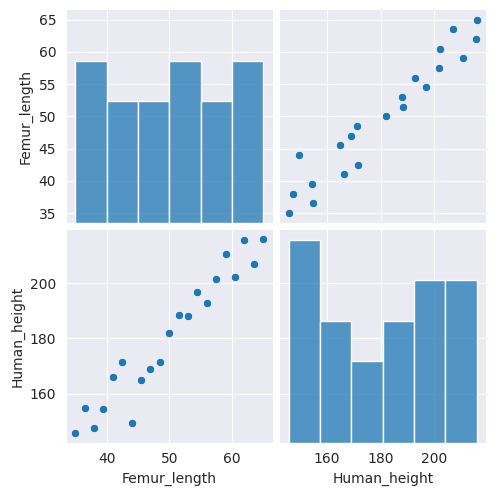

In [11]:
sns.pairplot(df)

<Axes: xlabel='Femur_length', ylabel='Human_height'>

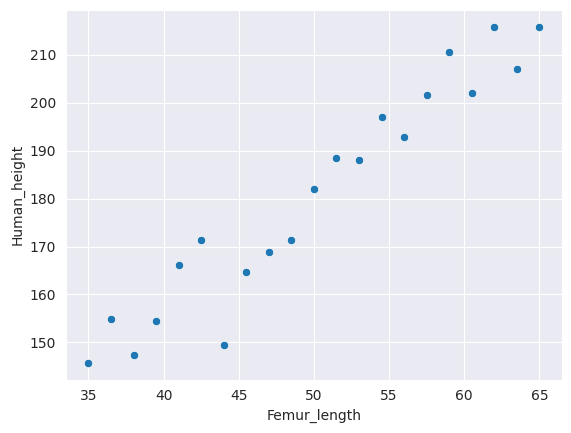

In [12]:
sns.scatterplot(x='Femur_length',y='Human_height',data=df)

<Axes: xlabel='Femur_length', ylabel='Count'>

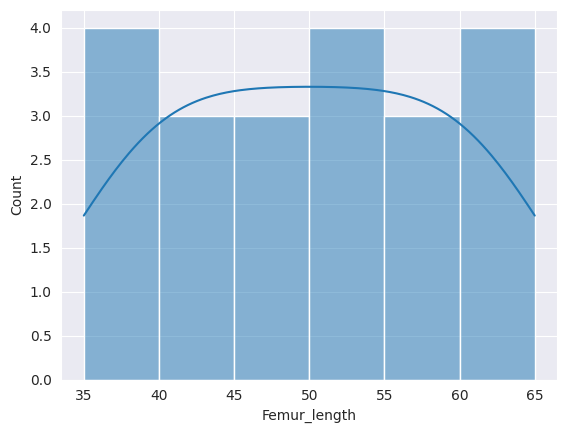

In [13]:
sns.histplot(df['Femur_length'],kde=True)

<Axes: xlabel='Human_height', ylabel='Count'>

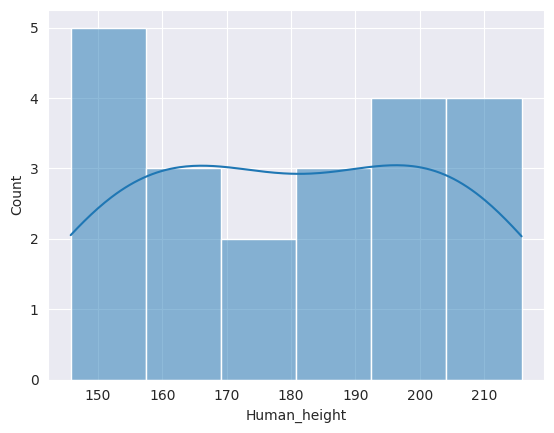

In [14]:
sns.histplot(df['Human_height'],kde=True)#destrubtion

<Axes: >

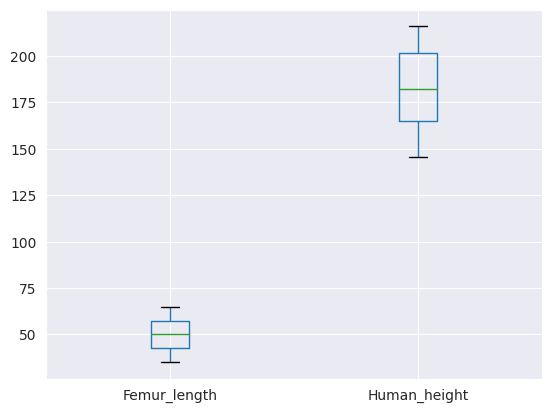

In [17]:
df.boxplot()


<Axes: xlabel='Femur_length', ylabel='Human_height'>

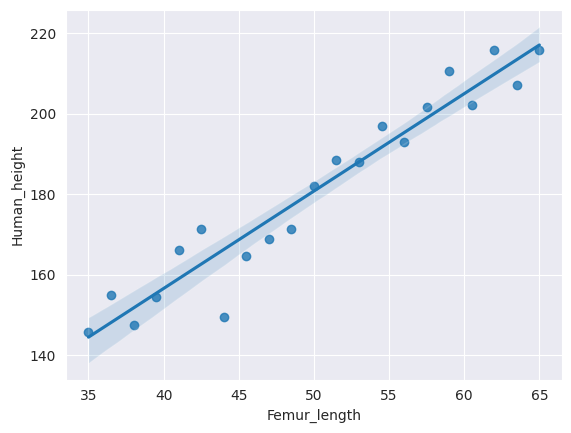

In [18]:
# fitted regression line.
sns.regplot(x='Femur_length',y='Human_height',data=df)

<Axes: >

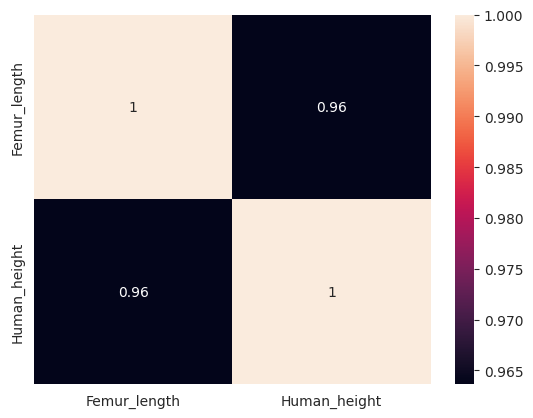

In [24]:
sns.heatmap(df.corr(),annot=True)

 #define target (y) and features (X)

In [25]:
x=df.drop('Human_height',axis=1)
y=df['Human_height']

In [26]:
x

,Femur_length
0,35.0
1,36.5
2,38.0
3,39.5
4,41.0
5,42.5
6,44.0
7,45.5
8,47.0
9,48.5


In [27]:
y

,Human_height
0,145.751662
1,154.819895
2,147.451499
3,154.532704
4,166.174503
5,171.453258
6,149.446089
7,164.732758
8,168.820250
9,171.326077


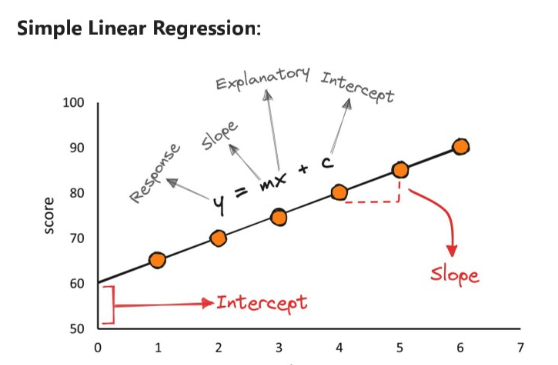

#Y=Femur_length*m+c

In [28]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [29]:
# check shape of train and test sample
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(5, 1)
(16,)
(5,)


In [33]:
# select model
from sklearn.linear_model import LinearRegression
regresser=LinearRegression()

In [34]:
# Training
regresser.fit(x_train,y_train)

LinearRegression()

In [35]:
regresser.coef_

array([2.36347025])

In [36]:
regresser.intercept_

62.52491098034058

In [37]:
#predict model
y_pred=regresser.predict(x_test)
y_pred

array([170.06280721, 209.06006628, 152.33678036, 155.88198573,
       148.79157499])

In [38]:
# model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [39]:
mean_absolute_error(y_test,y_pred)


4.851022010258868

In [40]:
mean_absolute_percentage_error(y_test,y_pred)#evaluate the performance of regression models


0.028807861097033156

In [41]:
mean_squared_error(y_test,y_pred)


26.9642434580903

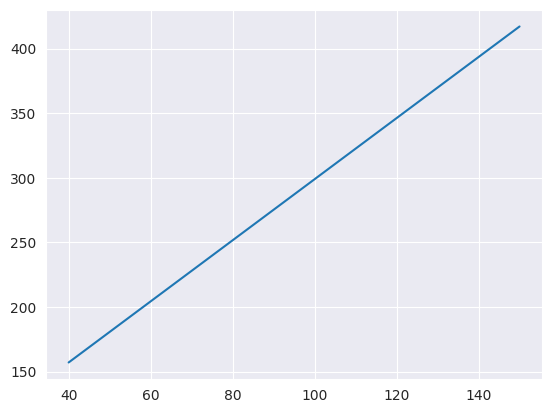

In [42]:
x=np.linspace(40,150,100)
y=regresser.intercept_+regresser.coef_*x

plt.plot(x,y)
plt.show()

In [43]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result

,Actual,Predicted
7,164.732758,170.062807
18,215.722244,209.060066
2,147.451499,152.336780
3,154.532704,155.881986
1,154.819895,148.791575


<Axes: >

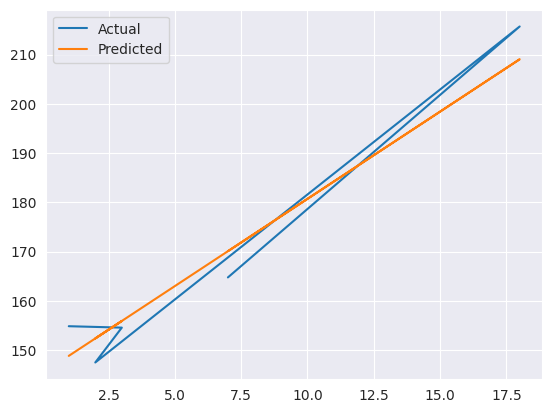

In [45]:
result.plot()